LCOE Data sources

LCOH: [DOE Hydrogen Program Record](https://www.hydrogen.energy.gov/docs/hydrogenprogramlibraries/pdfs/24005-clean-hydrogen-production-cost-pem-electrolyzer.pdf?sfvrsn=8cb10889_1#:~:text=Collectively%2C%20these%20show%20that%20electrolyzer,Initial%20Liftoff%20Report%20%5B4%5D.)

LCOT: [Paths to low-cost hydrogen energy at a scale for transportation applications in the USA and China via liquid-hydrogen distribution networks](http://dx.doi.org/10.1093/ce/zkz033)

Fuel economy: [AC Transit Fuel Cell Electric Bus Progress Report](https://www.osti.gov/servlets/purl/1963241)

Liquefication: [Hydrogen liquefaction: a review of the fundamental physics, engineering practice and future opportunities](https://doi.org/10.1039/D2EE00099G)

Tax credit: [Clean Hydrogen Production Tax Credit (45V) Resources](https://www.energy.gov/articles/clean-hydrogen-production-tax-credit-45v-resources)

Electricity rates: [Vermont Electric Cooperative](https://vermontelectric.coop/client_media/files/Rate_Summary_Effective_01_01_2024.pdf)

Electric Bus Efficiency: [Blog Post](https://www.sustainable-bus.com/news/electric-bus-range-electricity-consumption/)

Diesel Price: [EIA: Petroleum and Other Liquids](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emd_epd2d_pte_r1x_dpg&f=m)

Diesel Efficiency: [Blog Post](https://www.pfleet.com/blog/comparing-types-of-buses-and-their-mpg)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import random
import math

# Number of Monte Carlo simulations
sim = 100000

# Levelized Cost of Hydrogen Production from Hydropower (LCOH)
# Untaxed and unsubsidized production cost, converted from $2022 to $2024
LCOH_avg = 7.2
LCOH_stdev = (8.5 - 5.9) / 4  # 95% likely within the range
LCOH = np.random.normal(LCOH_avg, LCOH_stdev, sim)


# Levelized Cost of Transportation (LCOT)
# Using $0.03/kg/mile for transport in a cryogenic trailer. Does not include liquefaction.
# Need to turn into $/kg by taking a weighted avg of the miles to each depot based on how much fuel it needs

#win = winooski one hydropower, bec = air liquide becancour hydrogen production
depot_data = {
    "GMT": {"win": 6.3, "bec": 195, "All Buses": 173, "Long Range": 12, "All Miles": 7949, "Long Range Miles": 861, "H2 Pumps": 6},
    "AT": {"win": 95.5, "bec": 231, "All Buses": 20, "Long Range": 9, "All Miles": 2661, "Long Range Miles": 1961, "H2 Pumps": 2},
    "SET": {"win": 171, "bec": 314, "All Buses": 36, "Long Range": 7, "All Miles": 2025, "Long Range Miles": 522, "H2 Pumps": 2},
    "GMCN": {"win": 125, "bec": 330, "All Buses": 16, "Long Range": 1, "All Miles": 817, "Long Range Miles": 297, "H2 Pumps": 2},
    "RCT": {"win": 84.3, "bec": 168, "All Buses": 17, "Long Range": 5, "All Miles": 1471, "Long Range Miles": 879, "H2 Pumps": 2},
    "MV_RTD": {"win": 71.1, "bec": 261, "All Buses": 18, "Long Range":3, "All Miles": 1616, "Long Range Miles": 454, "H2 Pumps": 2},
    "TVT": {"win": 38.9, "bec": 228, "All Buses": 32, "Long Range": 5, "All Miles": 1608, "Long Range Miles": 661, "H2 Pumps": 2}
}

# pulling the relevant values
win_depots = [data["win"] for data in depot_data.values()]
bec_depots = [data["bec"] for data in depot_data.values()]

#average miles for transport, weighted by the route
depot_total_miles =[data["All Miles"] for data in depot_data.values()]
avg_miles_winooski = np.average(win_depots, weights=depot_total_miles)
avg_miles_bec = np.average(bec_depots, weights=depot_total_miles)

# get LCOT in $/kg
LCOT_w = 0.03 * avg_miles_winooski
LCOT_b = 0.03 * avg_miles_bec

# Fuel economy (miles/kg)
fuel_ec_avg = 8.07
fuel_ec_stdev = (8.37 - 7.71)/4
fuel_ec = np.random.normal(fuel_ec_avg, fuel_ec_stdev, sim)

#Levelized Cost of liquefication (LCOL)
#$2.5 to $3/kg
liq_avg = 2.75
liq_stdev = (3-2.5)/4
liq = np.random.normal(liq_avg, liq_stdev, sim)

# clean hydrogen tax credit
# credit is based on carbon intensity, assuming this project would get max tax credit because it is green hydrogen
tax_cred = 3


# Calculate LCOE for hydrogen production in VT
LCOE_hy_vt = (LCOH - tax_cred + (liq) + LCOT_w ) / fuel_ec

# Get avg and std dev
LCOE_hy_vt_avg = np.mean(LCOE_hy_vt)
LCOE_hy_vt_stdev = np.std(LCOE_hy_vt)
print(f"Hydrogen produced in VT avg LCOE ($/mile): {LCOE_hy_vt_avg:.2f}")
print(f"Standard Deviation Hydrogen produced in VT LCOE ($/mile): {LCOE_hy_vt_stdev:.2f}")

Hydrogen produced in VT avg LCOE ($/mile): 1.08
Standard Deviation Hydrogen produced in VT LCOE ($/mile): 0.09


In [3]:
# Hydrogen from Becancour

#Cost / kg
#PLACEHOLDER VALUE
bec_rate = 5

LCOE_hy_bec = (bec_rate + liq + LCOT_b ) / fuel_ec

# Get avg and std dev
LCOE_hy_bec_avg = np.mean(LCOE_hy_bec)
LCOE_hy_bec_stdev = np.std(LCOE_hy_bec)
print(f"Hydrogen produced in bec avg LCOE ($/mile): {LCOE_hy_bec_avg:.2f}")
print(f"Standard Deviation Hydrogen produced in bec LCOE ($/mile): {LCOE_hy_bec_stdev:.2f}")

Hydrogen produced in bec avg LCOE ($/mile): 1.80
Standard Deviation Hydrogen produced in bec LCOE ($/mile): 0.04


In [4]:
#BEVs
#electricity cost/kwh
# Used the large general time of day rates from vt electric coop 2024
elec = random.choices([0.14719, 0.20380, 0.36575], weights=[0.7, 0.2, 0.1], k=sim)
elec_off_peak = 0.14719

#efficiency in miles/kWh for electric buses
#VTrans used 0.476 in their report
bev_eff_avg = (0.376 + 0.338)/2
bev_eff_stdev = (0.376 - 0.338)/4
bev_eff = np.random.normal(bev_eff_avg, bev_eff_stdev, sim)

# Calculate LCOE for bev
LCOE_bev = elec / (bev_eff)
LCOE_bev_off_peak = elec_off_peak / (bev_eff)

# Get avg and std dev
LCOE_bev_avg = np.mean(LCOE_bev)
LCOE_bev_off_peak_avg = np.mean(LCOE_bev_off_peak)
LCOE_bev_stdev = np.std(LCOE_bev)
print(f"BEV avg LCOE ($/mile): {LCOE_bev_avg:.2f}")
print(f"BEV Off Peak avg LCOE ($/mile): {LCOE_bev_off_peak_avg:.2f}")
print(f"Standard Deviation of BEV LCOE ($/mile): {LCOE_bev_stdev:.2f}")

BEV avg LCOE ($/mile): 0.51
BEV Off Peak avg LCOE ($/mile): 0.41
Standard Deviation of BEV LCOE ($/mile): 0.18


In [6]:
#Diesel
#Price of diesel gas ($/gal)
# Used the range of this year for New England from the eia
diesel_price_avg = (4.3 + 3.7)/2
diesel_price_stdev = (4.3 - 3.7)/4
diesel_price = np.random.normal(diesel_price_avg, diesel_price_stdev, sim)

#efficiency in miles/gal
diesel_eff_avg = (3.5 + 6)/2
diesel_eff_stdev = (6 - 3.5)/4
diesel_eff = np.random.normal(diesel_eff_avg, diesel_eff_stdev, sim)

# Calculate LCOE for diesel
LCOE_diesel = diesel_price / diesel_eff

# Get avg and std dev
LCOE_diesel_avg = np.mean(LCOE_diesel)
LCOE_diesel_stdev = np.std(LCOE_diesel)
print(f"Diesel avg LCOE ($/mile): {LCOE_diesel_avg:.2f}")
print(f"Standard Deviation of BEV LCOE ($/mile): {LCOE_diesel_stdev:.2f}")

Diesel avg LCOE ($/mile): 0.86
Standard Deviation of BEV LCOE ($/mile): 0.12


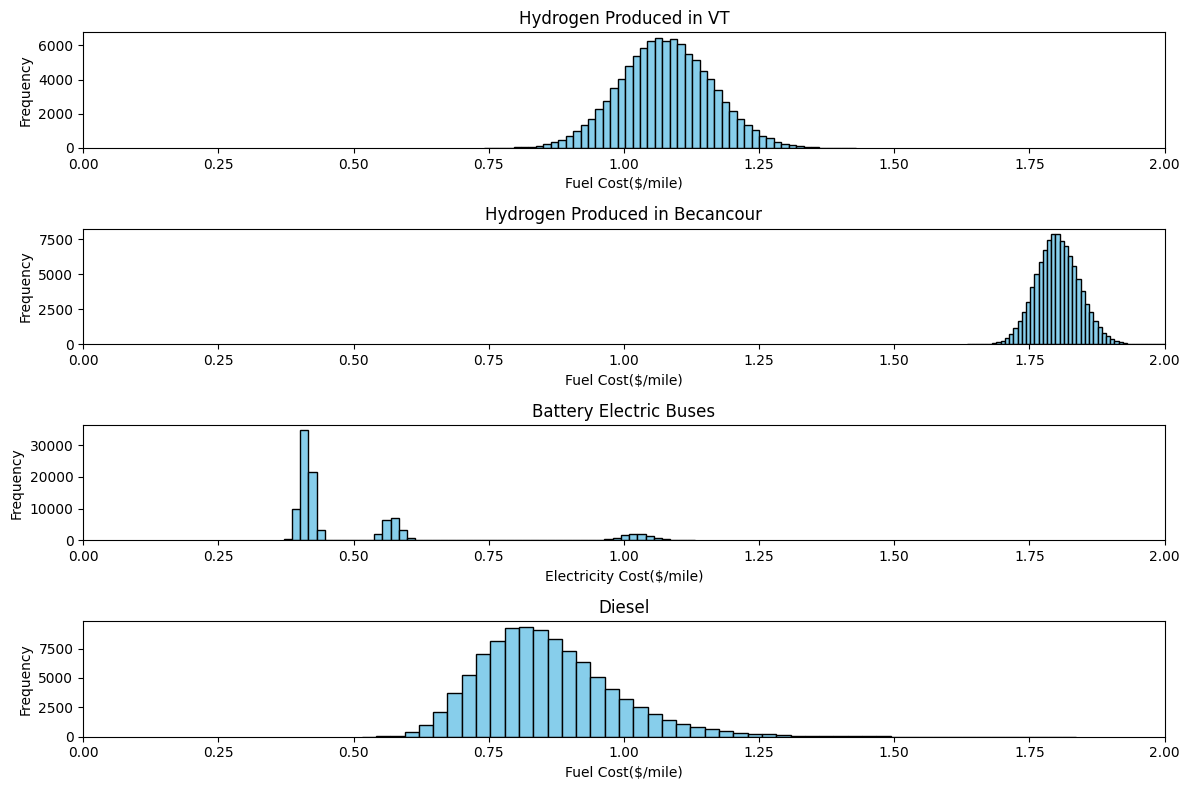

In [7]:
# Plotting
# Setting up the figure
fig, axs = plt.subplots(4, 1, figsize=(12, 8))

# find the bounds
x_min = 0
x_max = 2

# LCOE for Hydrogen Produced in VT
axs[0].hist(LCOE_hy_vt, bins=50, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Fuel Cost($/mile)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Hydrogen Produced in VT')
axs[0].set_xlim(x_min, x_max)

# LCOE for Hydrogen Produced in Becancour
axs[1].hist(LCOE_hy_bec, bins=50, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Fuel Cost($/mile)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Hydrogen Produced in Becancour')
axs[1].set_xlim(x_min, x_max)

# LCOE for Battery Electric
axs[2].hist(LCOE_bev, bins=50, color='skyblue', edgecolor='black')
axs[2].set_xlabel('Electricity Cost($/mile)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Battery Electric Buses')
axs[2].set_xlim(x_min, x_max)

# LCOE for Diesel
axs[3].hist(LCOE_diesel, bins=50, color='skyblue', edgecolor='black')
axs[3].set_xlabel('Fuel Cost($/mile)')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Diesel')
axs[3].set_xlim(x_min, x_max)

# Prevent overlap
plt.tight_layout()

# Display
plt.show()
plt.close()

In [8]:
# Hydrogen infrastructure costs (fueling stations and storage)

# Pump costs in $/kg/day/dispenser
hy_pumps_avg = (300+740)/2
hy_pumps_stdev = (740 - 300)/4
hy_pumps = np.random.normal(hy_pumps_avg, hy_pumps_stdev, sim)

# Getting pumps per depot
h2_pumps_per_depot = [data["H2 Pumps"] for data in depot_data.values()]

#depot_total_miles

#Using the fuel economy from above (miles/kg), the total #of miles travelled, and the projected pumps at each depot
pump_cost_all = [0]*sim
pump_cost_long = [0]*sim
for i in range(0,7):
    pump_cost_all += hy_pumps * h2_pumps_per_depot[i] * depot_total_miles[i]/ fuel_ec
    pump_cost_long += hy_pumps * 2 * depot_total_miles[i]/ fuel_ec

In [9]:
# Electric charging stations

# Charger cost ($/charger)
charger_cost_avg = (250000+50000)/2
charger_cost_stdev = (250000-50000)/4
charger_cost = np.random.normal(charger_cost_avg, charger_cost_stdev, sim)

#Number of buses per depot
all_buses_per_depot = [data["All Buses"] for data in depot_data.values()]
long_buses_per_depot = [data["Long Range"] for data in depot_data.values()]

# Using the estimate from Ross of 11-12 chargers for every 10 buses
chargers_per_10 = np.array(random.choices([11,12], weights=[0.5, 0.5], k=sim))

all_buses_charger_cost = [0]*sim
short_range_buses_charger_cost = [0]*sim
for i in range (0,7):
    # Multiply buses per depot by chargers per 10 buses, round up to an integer
    chargers_needed_all = np.ceil(all_buses_per_depot[i] * chargers_per_10 / 10)
    chargers_needed_short_range = np.ceil((all_buses_per_depot[i] - long_buses_per_depot[i]) * chargers_per_10 / 10)

    # Calculate charger costs for all buses and short-range buses
    all_buses_charger_cost += chargers_needed_all * charger_cost
    short_range_buses_charger_cost += chargers_needed_short_range * charger_cost

In [11]:
#Bus costs
#HFC
hfc_avg = (1100000 + 1100000)/2
hfc_stdev = (1200000 - 1100000)/4
hfc = np.random.normal(hfc_avg, hfc_stdev, sim)

#BEV
bev_avg = (900000 + 1170000)/2
bev_stdev = (1170000 - 900000)/4
bev = np.random.normal(bev_avg, bev_stdev, sim)

# Costs
all_buses_HFC_cost = [0] * sim
long_buses_HFC_cost = [0] * sim
all_buses_bev_cost = [0] * sim
short_buses_bev_cost = [0] * sim
for i in range(0,7):
    all_buses_HFC_cost += hfc * all_buses_per_depot[i]
    long_buses_HFC_cost += hfc * long_buses_per_depot[i]
    all_buses_bev_cost += bev * all_buses_per_depot[i]
    short_buses_bev_cost += bev * (all_buses_per_depot[i] - long_buses_per_depot[i])

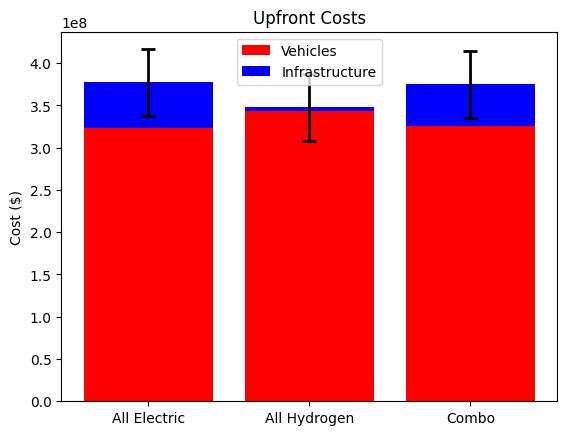

In [14]:
# Compare the upfront costs of each scenario
scenarios = ['All Electric', 'All Hydrogen', 'Combo']
vehicles = [np.mean(all_buses_bev_cost), np.mean(all_buses_HFC_cost), np.mean(short_buses_bev_cost)+np.mean(long_buses_HFC_cost)]
infrastructure = [np.mean(all_buses_charger_cost), np.mean(pump_cost_all), np.mean(short_range_buses_charger_cost)+np.mean(pump_cost_long)]
 
error = [39306672.31,39830110.2,39722948.72]
# plot bars in stack manner
plt.bar(scenarios, vehicles, color='r')
plt.bar(scenarios, infrastructure, bottom=vehicles, color='b')

for i, scenario in enumerate(scenarios):
    # Plotting error bars for each bar
    plt.errorbar(scenario, vehicles[i] + infrastructure[i], yerr=error[i], 
                 fmt='none', ecolor='black', elinewidth=2, capsize=5, capthick=2)
plt.title('Upfront Costs')
plt.ylabel('Cost ($)')
plt.legend(["Vehicles", "Infrastructure"], loc = "upper center")
plt.show()